Plot the ratio of the principal normal and shear stresses to the maximum contact area pressure as a function of the depth below the surface along the z axis for two spheres.

In [1]:
from sympy import symbols, Eq, lambdify, init_printing, pi, Abs, atan, S

In [2]:
import sympy; sympy.__version__

'1.5.1'

In [3]:
from IPython.html.widgets import interactive
from IPython.display import display

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


ImportError: cannot import name interactive

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%matplotlib nbagg

In [6]:
init_printing()

First define all of the known and unknown symbols needed for the calculations for sphere to sphere contact.

In [7]:
a, F, v, v1, v2, E1, E2, d1, d2 = symbols('a, F, nu, nu1, nu2, E1, E2, d1, d2', real=True)
p_max, s1, s3, t13, z = symbols('p_max, sigma1, sigma3, tau_13, z', real=True)

Now define the equations for the contact area radius, $a$, the maximum pressure at the contact area, $p_{max}$, and the principal stresses along the $z$ axis.

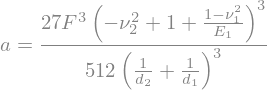

In [8]:
radius_eq = Eq(a, (3 * F / 8 * ((1 - v1**2) / E1 + (1 - v2**2)) / (1 / d1 + 1 / d2))**3)
radius_eq

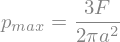

In [9]:
pressure_eq = Eq(p_max, 3 * F / 2 / pi / a**2)
pressure_eq

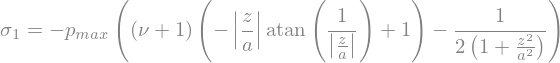

In [10]:
s1_eq = Eq(s1, -p_max * ((1 - Abs(z / a) * atan(1 / Abs(z / a))) * (1 + v) - S(1) / 2 / (1 + z**2 / a**2)))
s1_eq

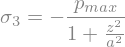

In [11]:
s3_eq = Eq(s3, -p_max / (1 + z**2 / a**2))
s3_eq

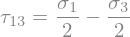

In [12]:
t_max_eq = Eq(t13, (s1 - s3) / 2)
t_max_eq

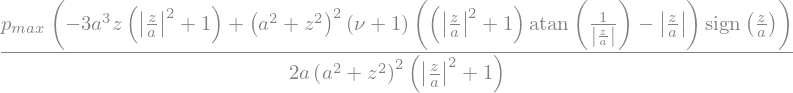

In [13]:
t_max_eq.rhs.subs({s1: s1_eq.rhs, s3: s3_eq.rhs}).diff(z).simplify()

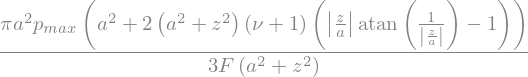

In [14]:
(s1_eq.rhs / pressure_eq.rhs).simplify()

Create some functions to evaluate the expressions that we derived above.

In [15]:
f_a = lambdify((F, v1, v2, E1, E2, d1, d2), radius_eq.rhs, modules='numpy')

In [16]:
f_p_max = lambdify((F, a), pressure_eq.rhs, modules='numpy')

In [17]:
f_s1 = lambdify((p_max, z, a, v), s1_eq.rhs, modules='numpy')

In [18]:
f_s3 = lambdify((p_max, z, a), s3_eq.rhs, modules='numpy')

In [19]:
f_t_max = lambdify((s1, s3), t_max_eq.rhs, modules='numpy')

We need a graph of $\frac{\sigma_1, \sigma_3, \tau_{1/2}}{p_{max}}$ vs $z$ so define a function that produces the plot.

In [20]:
def plot_stresses(max_depth=3.0, v1=0.326, v2=0.324, E1=17.2E6, E2=15.4E6, d1=1.0, d2=2.0):
    """Plots the principal stresses in each sphere versus the depth along the z axis.
    
    Parameters
    ===========
    max_depth : float
        The depth is defined as z = max_depth * a.
    v1, v2 : float
        Poisson's ratio for sphere 1 and 2.
    E1, E2 : float
        Modulus of elasticity for sphere 1 and 2.
    d1, d2 : float
        Diameters of sphere 1 and 2.
    
    """
    
    fig, axes = plt.subplots(1, 2, sharey=True)

    
    F = 1.0
    
    a = f_a(F, v1, v2, E1, E2, d1, d2)
    z = np.linspace(1E-14, max_depth * a, num=100)
    p_max = f_p_max(F, a)
    
    s1_1 = f_s1(p_max, z, a, v1)
    s3_1 = f_s3(p_max, z, a)
    t_13_1 = f_t_max(s1_1, s3_1)

    s1_2 = f_s1(p_max, z, a, v2)
    s3_2 = s3_1
    t_13_2 = f_t_max(s1_2, s3_2)
    
    z = z / a
    
    axes[0].plot(z, np.abs(s1_1 / p_max),
                 z, np.abs(s3_1 / p_max),
                 z, np.abs(t_13_1/ p_max))
    axes[1].plot(z, np.abs(s1_2 / p_max),
                 z, np.abs(s3_2 / p_max),
                 z, np.abs(t_13_2/ p_max))
    
    axes[0].legend([r'$\sigma_1$', r'$\sigma_2$', r'$\tau_{max}$'])
    axes[1].legend([r'$\sigma_1$', r'$\sigma_2$', r'$\tau_{max}$'])
    
    axes[0].set_xlabel('$z/a$')
    axes[1].set_xlabel('$z/a$')

    axes[0].set_ylabel(r'$\frac{\sigma_1, \sigma_3, \tau_{1/2}}{p_{max}}$')
    
    axes[0].set_title('Sphere 1')
    axes[1].set_title('Sphere 2')
    
    plt.tight_layout()

    plt.show()    

In [21]:
plot_stresses()

<IPython.core.display.Javascript object>

In [22]:
w = interactive(plot_stresses, v1=(0.2, 0.5), v2=(0.2, 0.5), E1=(0.0, 50.0E6),
                E2=(0.0, 50.0E6), d1=(-10.0, 10.0), d2=(-10.0, 10.0))

NameError: name 'interactive' is not defined

In [23]:
display(w)

NameError: name 'w' is not defined